In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
# display(HTML("<style>.container { font-weight: bold !important;}</style>"))
# display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

# 퀴즈 

피마 인디언 당뇨병(Pima Indian Diabets) 데이터 세트를 이용해 당뇨병 여부를 판단하는 머신러닝 예측 모델을 수립하고 
테스트 하여라. 

<!-- 아래그림 확인 -->
<img src="https://thebook.io/img/080228/137.jpg">
<br>
<img src="http://health.chosun.com/site/data/img_dir/2005/09/29/c2005092956311_01.jpg">

* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0 또는 1)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import cross_val_score 
# from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import classification_report


## 1

In [3]:
df_diabetes = pd.read_csv('diabetes.csv')

In [4]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df_diabetes.shape

(768, 9)

In [6]:
#Outcome: 클래스 결정 값(0 또는 1)
# 1 : 당뇨, 0 : 정상
df_diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## 2

In [8]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
print(df_diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [15]:
df_diabetes.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

## 3

In [9]:
# Min 값이 0인 피처명 리스트
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = df_diabetes['Glucose'].count()

# 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = df_diabetes[df_diabetes[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))


Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [10]:
df_diabetes[zero_features] = df_diabetes[zero_features].replace(0, df_diabetes[zero_features].mean())

In [11]:
# 다시 확인 
# 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = df_diabetes[df_diabetes[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))


Glucose 0 건수는 0, 퍼센트는 0.00 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


In [12]:
# min 값이 0이 아님 확인 
df_diabetes['Glucose'].describe()

count    768.000000
mean     121.681605
std       30.436016
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [15]:
X = df_diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
scaler = StandardScaler( )
scaler.fit(X)
temp = scaler.fit_transform(X)
print(type(temp))

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

<class 'numpy.ndarray'>


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496


In [16]:
# 5) 학습 데이타셋과 테스트 데이타셋으로 분리시키고 모델을 생성한 후 
#    머신러닝 예측 모델을 수립하고 학습하여라 

y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                      random_state = 156, stratify=y)

model_dt = DecisionTreeClassifier(random_state=11)
model_dt.fit(X_train , y_train)

DecisionTreeClassifier(random_state=11)

[0.04207819 0.32186146 0.07676339 0.03858707 0.09504626 0.16839489
 0.17662197 0.08064677]


<AxesSubplot:>

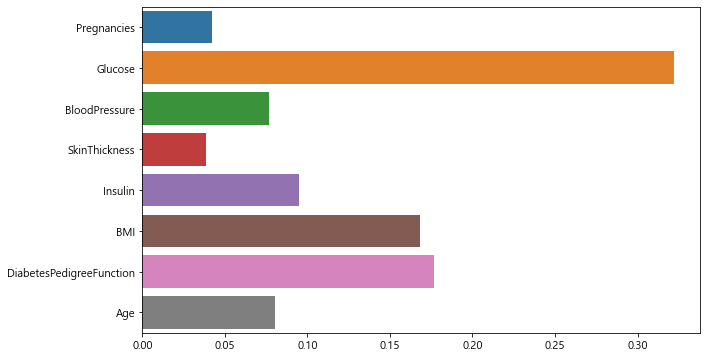

In [17]:
# 10) 가장 중요도가 높은 피처 2개는 무엇인가?
print(model_dt.feature_importances_)

# 피처 중요도 시각화 
sns.barplot(x=model_dt.feature_importances_ , y=X.columns)

In [18]:
# 6) 오차행렬, 재현율, 정밀도, 정확도, F1 Score 등의 평가지표를 출력하여라 

from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

confusion_matrix(y_test, model_dt.predict(X_test))

array([[83, 17],
       [23, 31]], dtype=int64)

Text(40.0, 0.5, 'Actual')

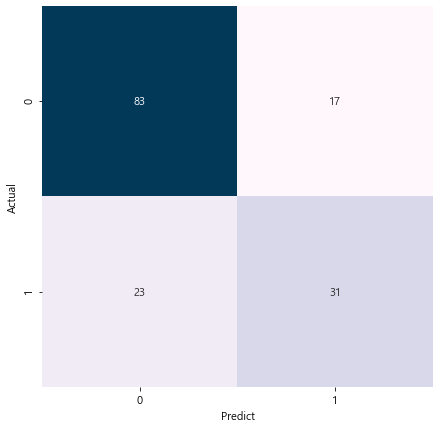

In [19]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test, model_dt.predict(X_test)), \
            annot=True, cmap='PuBu', cbar=False);
plt.xlabel('Predict')
plt.ylabel('Actual')

In [20]:
print(classification_report(y_test, model_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       100
           1       0.65      0.57      0.61        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154



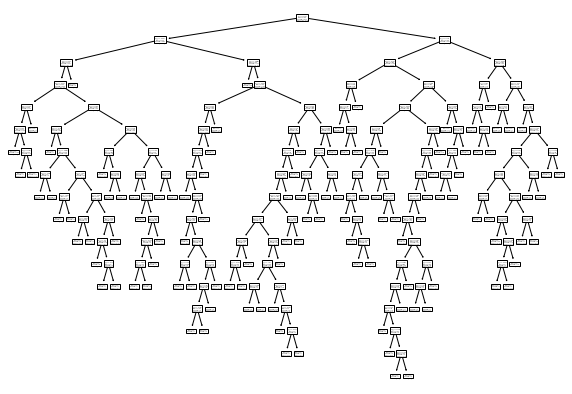

In [21]:
from sklearn.tree import plot_tree

# 트리 시각화 
plt.figure(figsize=(10,7))
# 트리 생성
plot_tree(model_dt)

plt.show()

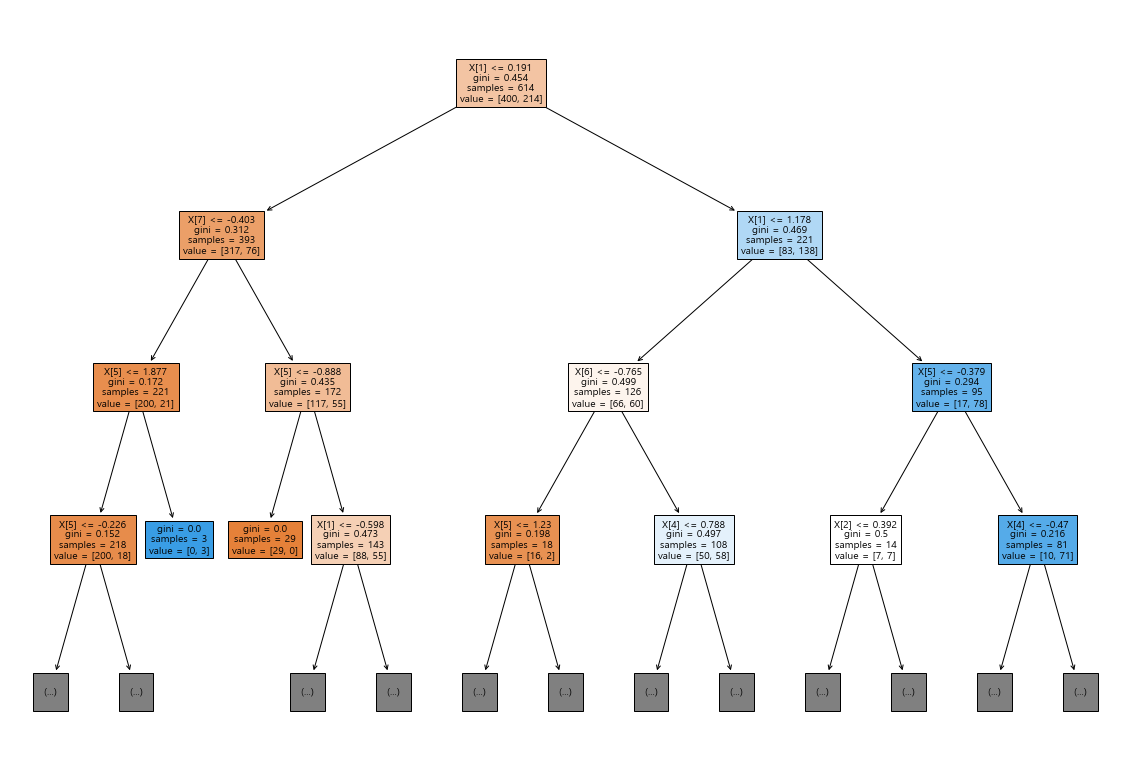

In [22]:
plt.figure(figsize=(20,14))

# plot_tree(model_dt, max_depth=3, filled=True, feature_names=X.columns, fontsize=10)
plot_tree(model_dt, max_depth=3, filled=True,  fontsize=10)
plt.show()

In [23]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [24]:
# 8) 아래의 소스를 참조하여 그리드서치를 적용시켜 최적의 하이퍼파라미터 예측 모델을 생성하여라. 

model_dt = DecisionTreeClassifier(random_state=11)

parameters = {'max_depth':[2,3,5,10] }

grid_cv = GridSearchCV(model_dt , param_grid=parameters , scoring='accuracy' , cv=5, verbose=1)

In [25]:
grid_cv.fit(X_train , y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10]}, scoring='accuracy',
             verbose=1)

In [26]:
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치:0.7475
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3}


In [27]:
# 최적 하이퍼 파라미터: {'max_depth': 3} 로 추정되는 모델 다시 생성 
model_dt2 = DecisionTreeClassifier(max_depth=3, random_state=11)
model_dt2.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3, random_state=11)

In [28]:
print("f1_score:", f1_score(y_test , model_dt2.predict(X_test)))
print()
print(classification_report(y_test, model_dt2.predict(X_test)))

f1_score: 0.5384615384615384

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       100
           1       0.56      0.52      0.54        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.69       154



Text(40.0, 0.5, 'Actual')

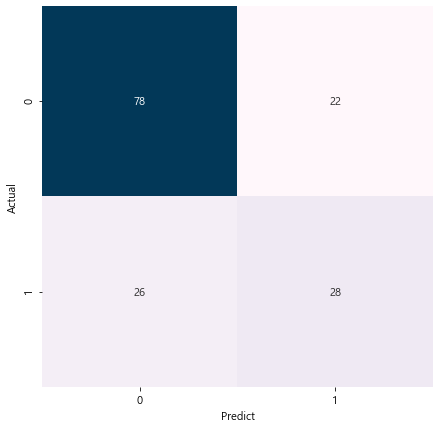

In [29]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test, model_dt2.predict(X_test)), \
            annot=True, cmap='PuBu', cbar=False);
plt.xlabel('Predict')
plt.ylabel('Actual')

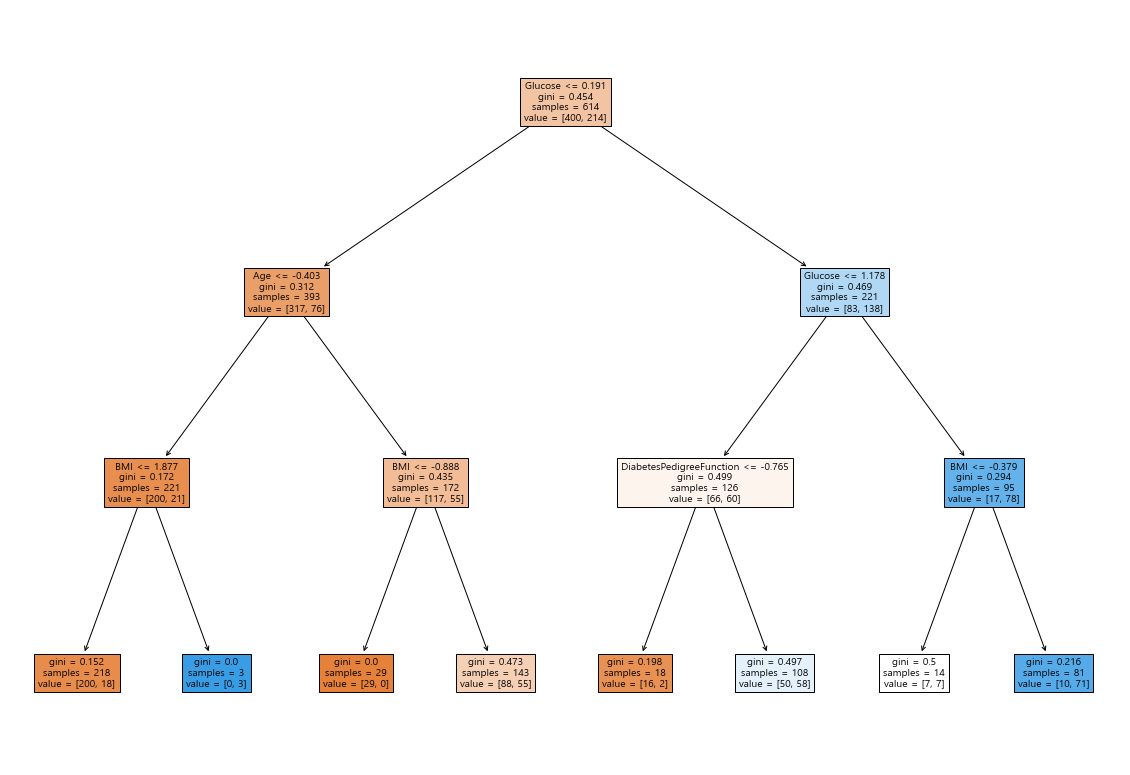

In [30]:
plt.figure(figsize=(20,14))
plot_tree(model_dt2, max_depth=3, filled=True, feature_names=X.columns, fontsize=10)
plt.show()

[0.         0.67951197 0.         0.         0.         0.16092341
 0.05811913 0.10144549]

Pregnancies : 0.000
Glucose : 0.680
BloodPressure : 0.000
SkinThickness : 0.000
Insulin : 0.000
BMI : 0.161
DiabetesPedigreeFunction : 0.058
Age : 0.101



<AxesSubplot:>

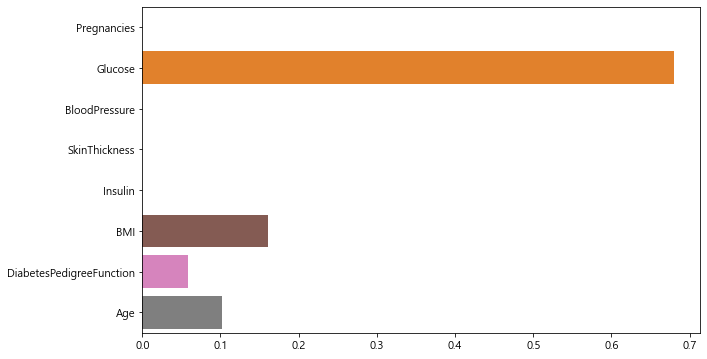

In [31]:
# 10) 가장 중요도가 높은 피처 2개는 무엇인가?
print(model_dt2.feature_importances_)
print()

for name, value in zip(X.columns , model_dt2.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
print()

# 피처 중요도 시각화 
sns.barplot(x=model_dt2.feature_importances_ , y=X.columns)

# Quiz 2

- 1) redwine.csv 파일을 이용하여 데이타프레임을 생성하여라 
- 2) 피처별로 전처리를 진행하여라. (결측값, 인코딩, 원핫인코딩등) 
- 3) 학습 데이타셋과 테스트 데이타셋으로 분리시키고 모델을 생성한 후 
   머신러닝 예측 모델을 수립하고 학습하여라 


```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                        random_state = 156, stratify=y)
model_dt = DecisionTreeClassifier(random_state=11)

```

- 4) plot_tree() 를 이용하여 결정트리 모델을 시각화하여라 

- 5) 오차행렬, 재현율, 정밀도, 정확도, F1 Score 등의 평가지표를 출력하여라 

- 6) 아래의 소스를 참조하여 그리드서치를 적용시켜 최고의 하이퍼파라미터 예측 모델을 생성하여라. 

model_dt = DecisionTreeClassifier(random_state=11)

parameters = {'max_depth':[2,3,5, 7, 8, 10] }

model_dt_grid = GridSearchCV(model_dt , param_grid=parameters , scoring='accuracy' , cv=5)

- 7) 최적의 하이퍼파라미터로 모델을 생성하고 다시 학습시킨 후 평가지표를 확인하여라 

- 8) 가장 중요도가 높은 피처 3개는 무엇인가?

- 9) 7의 모델과  plot_tree() 를 이용하여 결정트리 모델을 시각화하여라 

In [20]:
df_redwine = pd.read_csv('redwine.csv')

In [21]:
df_redwine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [24]:
df_redwine.sample(5)

,alcohol,sugar,pH,class
2212,8.7,10.9,3.00,1.0
2750,8.9,7.5,3.14,1.0
1928,10.4,1.3,3.17,1.0
5712,11.2,1.1,3.26,1.0
6307,10.6,1.4,3.28,1.0


In [22]:
df_redwine.shape

(6497, 4)

In [23]:
df_redwine.isnull().sum()

alcohol    0
sugar      0
pH         0
class      0
dtype: int64

In [26]:
pd.get_dummies(df_redwine['class'])

,0.0,1.0
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
6492,0,1
6493,0,1
6494,0,1
6495,0,1


In [27]:
df_redwine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

In [33]:
#X 입력 데이터와 y 타겟 데이터 분리
X = df_redwine[['alcohol', 'sugar', 'pH']]
y = df_redwine['class']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                        random_state = 156, stratify=y)
model_dt = DecisionTreeClassifier(random_state=11)
model_dt.fit(X_train , y_train)

DecisionTreeClassifier(random_state=11)

In [35]:
X_train.shape, X_test.shape

((5197, 3), (1300, 3))

In [36]:
X_train.sample(2)

,alcohol,sugar,pH
1633,10.2,14.95,3.37
2831,12.6,5.85,3.16


In [37]:
X_test.sample(2)

,alcohol,sugar,pH
3021,9.1,1.1,3.32
2631,10.2,6.8,3.49


In [39]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 11,
 'splitter': 'best'}

In [40]:
from sklearn.tree import plot_tree

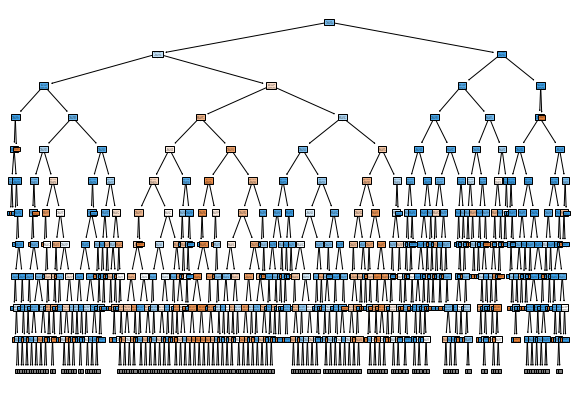

In [42]:
#트리 시각화
plt.figure(figsize=(10,7))

#트리 생성
plot_tree(model_dt, max_depth=10, filled=True)

plt.show()

In [44]:
accuracy_score(y_test, model_dt.predict(X_test))

0.8753846153846154

In [45]:
#오차행렬
confusion_matrix(y_test, model_dt.predict(X_test))

array([[243,  77],
       [ 85, 895]], dtype=int64)

In [46]:
# accuracy_score 정확도 = (TN + TP) / (TN + FP + FN + TP)
confmat = confusion_matrix(y_test, model_dt.predict(X_test))
print(accuracy_score(y_test, model_dt.predict(X_test)))
(confmat[0,0] + confmat[1,1]) / (confmat[0,0] + confmat[0,1] + confmat[1,0] + confmat[1,1])

0.8753846153846154


0.8753846153846154

In [48]:
from sklearn.metrics import mean_squared_error
# mean_squared error 오류율 = (FN + FP) / (TN + FP + FN + TP)
print(mean_squared_error(y_test, model_dt.predict(X_test)))
(confmat[0,1] + confmat[1,0]) / (confmat[0,0] + confmat[0,1] + confmat[1,0] + confmat[1,1])

0.12461538461538461


0.12461538461538461

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

print("정밀도:", precision_score(y_test, model_dt.predict(X_test)))
print("재현율:", recall_score(y_test, model_dt.predict(X_test)))

# Confusion Matrix에 적용 : TP / (FP + TP)
print("\n\n정밀도:", (confmat[1,1] / (confmat[0,1] + confmat[1,1])))

# Confusion Matrix에 적용 : FN / (FP + TP)
print("재현율:", (confmat[1,1] / (confmat[1,0] + confmat[1,1])))

정밀도: 0.9207818930041153
재현율: 0.9132653061224489


정밀도: 0.9207818930041153
재현율: 0.9132653061224489


In [50]:
from sklearn.metrics import f1_score 

f1 = f1_score(y_test , model_dt.predict(X_test))
print(f'F1 스코어: {f1:.4f}')

F1 스코어: 0.9170


In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model_dt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       320
         1.0       0.92      0.91      0.92       980

    accuracy                           0.88      1300
   macro avg       0.83      0.84      0.83      1300
weighted avg       0.88      0.88      0.88      1300



In [66]:
#모델 적용
model_dt2 = DecisionTreeClassifier(random_state=11)

#모델에 적용할 하이퍼파라미터값 지정
#parameters = {'하이퍼파라미터변수' : [값1, 값2, ...]}
parameters = {'max_depth': [2,3,5,7,8,10] }

#그리드서치 객체 생성
#GridSearchCV(모델명, param_grid=하이퍼파라미터 딕셔너리, cv=폴더갯수, 
#          (옵션)             return_train_score=True, refit=True)
model_dt2_grid = GridSearchCV(model_dt2 , param_grid=parameters , scoring='accuracy' , cv=5,
                             return_train_score=True, refit=True)

#그리드서치에 데이터 적용
model_dt2_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 7, 8, 10]},
             return_train_score=True, scoring='accuracy')

In [67]:
#그리드서치객체명.best_params_ : 점수를 최대한 높게 낼 수 있는 하이퍼파라미터 최적값
#그리드서치객체명.best_score_ : 최고점수
print('GridSearchCV 최적 파라미터:', model_dt2_grid.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(model_dt2_grid.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 5}
GridSearchCV 최고 정확도: 0.8632


In [68]:
#각각의 훈련세트 점수 -> 데이터프레임
scores_df = pd.DataFrame(model_dt2_grid.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002543,0.002493,0.003934,0.005893,2,{'max_depth': 2},0.823077,0.808654,0.817132,0.815207,...,0.813160,0.007338,6,0.809719,0.815492,0.811207,0.830207,0.815055,0.816336,0.007278
1,0.000598,0.001197,0.003505,0.006115,3,{'max_depth': 3},0.856731,0.836538,0.850818,0.847931,...,0.846065,0.007626,5,0.844840,0.850613,0.846561,0.850168,0.849447,0.848326,0.002243
2,0.006243,0.007646,0.000000,0.000000,5,{'max_depth': 5},0.870192,0.857692,0.866218,0.857555,...,0.863190,0.004927,1,0.871783,0.876113,0.871813,0.873978,0.870611,0.872859,0.001957
3,0.000000,0.000000,0.000000,0.000000,7,{'max_depth': 7},0.873077,0.849038,0.857555,0.857555,...,0.860111,0.007926,2,0.885254,0.895357,0.887927,0.892977,0.887927,0.889888,0.003705
4,0.009363,0.007645,0.000000,0.000000,8,{'max_depth': 8},0.871154,0.857692,0.856593,0.846006,...,0.855105,0.009704,4,0.901852,0.901852,0.900433,0.905483,0.900914,0.902107,0.001775
5,0.004738,0.005751,0.000789,0.000967,10,{'max_depth': 10},0.873077,0.848077,0.855630,0.845043,...,0.855877,0.009767,3,0.931682,0.928314,0.932900,0.937470,0.925204,0.931114,0.004164


In [55]:
scores_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [57]:
scores_df[['rank_test_score','params','mean_test_score']]

,rank_test_score,params,mean_test_score
0,6,{'max_depth': 2},0.813160
1,5,{'max_depth': 3},0.846065
2,1,{'max_depth': 5},0.863190
3,2,{'max_depth': 7},0.860111
4,4,{'max_depth': 8},0.855105
5,3,{'max_depth': 10},0.855877


In [69]:
print(f'GridSearchCV 최적 파라미터: {model_dt2_grid.best_params_}' )
print(f'GridSearchCV 최고 정확도: {model_dt2_grid.best_score_}')

GridSearchCV 최적 파라미터: {'max_depth': 5}
GridSearchCV 최고 정확도: 0.8631900125860664


In [70]:
model_dt2.fit(X_train , y_train)
model_dt2.feature_importances_

array([0.24219552, 0.50704878, 0.2507557 ])

In [62]:
#어떤 컬럼이 제일 중요도가 높을까?
for name, value in zip(df_redwine.columns, model_dt.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

alcohol : 0.242
sugar : 0.507
pH : 0.251


In [73]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 11,
 'splitter': 'best'}

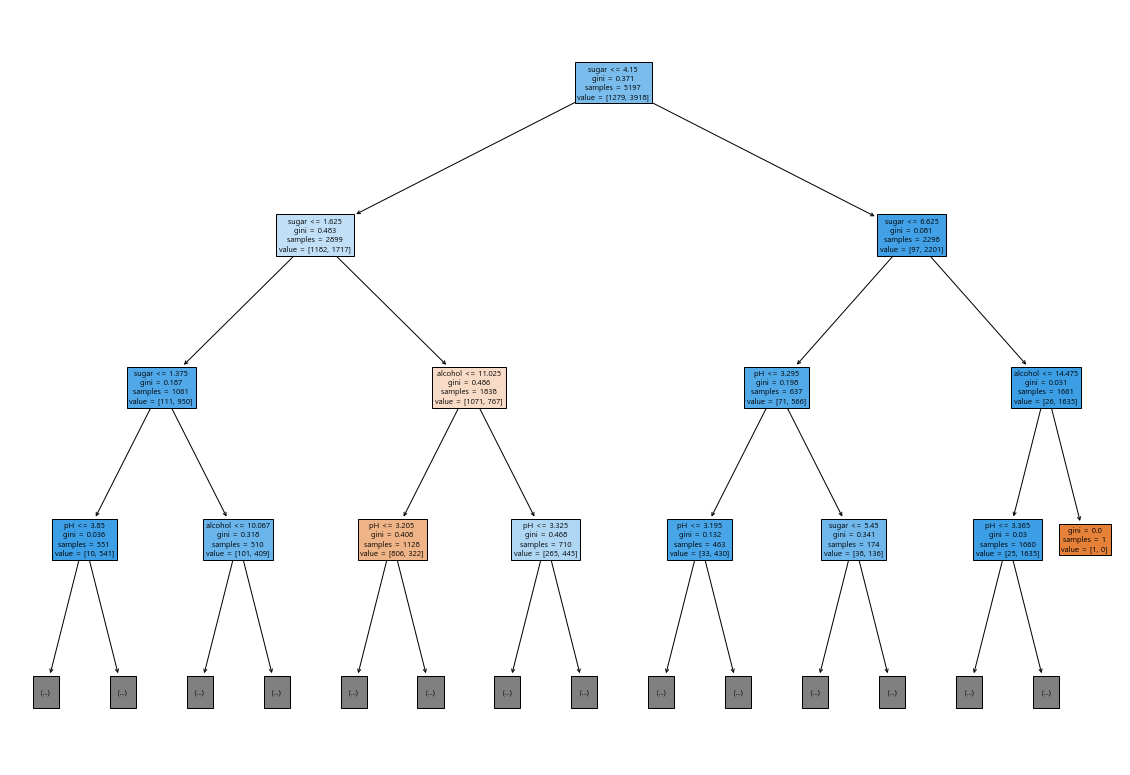

In [78]:
plt.figure(figsize=(20,14))
plot_tree(model_dt2, max_depth=3, filled=True, feature_names=df_redwine.columns)
plt.show()